In [ ]:
import os
import zipfile
import pandas as pd
import numpy as np
from tqdm import tqdm #for progress bar

In [ ]:
#Download dataset from https://archive.ics.uci.edu/static/public/283/dataset+for+adl+recognition+with+wrist+worn+accelerometer.zip and store in a file called dataset.zip
!wget https://archive.ics.uci.edu/static/public/283/dataset+for+adl+recognition+with+wrist+worn+accelerometer.zip  -O dataset.zip

--2024-11-05 07:49:42--  https://archive.ics.uci.edu/static/public/283/dataset+for+adl+recognition+with+wrist+worn+accelerometer.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘dataset.zip’

dataset.zip             [ <=>                ]   1.28M  7.00MB/s    in 0.2s    

2024-11-05 07:49:43 (7.00 MB/s) - ‘dataset.zip’ saved [1346107]



In [ ]:
def read_file(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Remove trailing newline character
            line = line.rstrip('\n')
            # Split the line by space delimiter
            values = line.split(' ')
            # Convert the coded values to real acceleration values
            real_values = [(-1.5 + (int(val) / 63) * 3) for val in values]
            data.append(real_values)

    return pd.DataFrame(data, columns=['X', 'Y', 'Z'])


In [ ]:
def read_dataset(zip_file_path, extracted_folder_path, sampling_frequency):

  # Create an empty DataFrame to store the dataset
  df = pd.DataFrame()

  # Extract the files from the zip file
  with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
      zip_ref.extractall(extracted_folder_path)

  # Iterate over all subdirectories inside the extracted folder
  id = 0
  for root, dirs, files in os.walk(extracted_folder_path):
      for directory in tqdm(dirs, total=len(dirs)):
          directory_path = os.path.join(root, directory)

          # Check if the directory contains files starting with "Accelerometer"
          if any(file.startswith('Accelerometer') for file in os.listdir(directory_path)):

              # Iterate over the files in the directory
              for filename in os.listdir(directory_path):
                  if filename.startswith('Accelerometer'):
                      file_path = os.path.join(directory_path, filename)

                      # Extract information from the file name
                      file_parts = filename.split('-')
                      start_time = '-'.join(file_parts[1:7])
                      volunteer = file_parts[-1].split('.')[0]
                      label = file_parts[7]

                      # Read the dataset from the file
                      dataset = read_file(file_path)

                      # Extract the start time from the filename
                      start_time = pd.to_datetime(start_time, format='%Y-%m-%d-%H-%M-%S')


                      # Calculate the time increment based on the sampling frequency
                      time_increment = pd.to_timedelta(1 / sampling_frequency, unit='s')

                      # Create a new column for the adjusted time
                      dataset['Time'] = start_time + (pd.to_timedelta(dataset.index* time_increment, unit='s') )


                      # Add the label, start time, and volunteer columns
                      dataset['Start_Time'] = start_time
                      dataset['Label'] = label
                      dataset['Volunteer'] = volunteer
                      dataset['id'] = id
                      id += 1

                      # Append the dataset to the DataFrame
                      df = pd.concat([df, dataset])
  return df

In [ ]:
# Read and Print the DataFrame using the read_dataset function we just created
df =  read_dataset("./dataset.zip", "./sample_data1", 30)
df.head()


100%|██████████| 21/21 [00:14<00:00,  1.45it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


,X,Y,Z,Time,Start_Time,Label,Volunteer,id
0,-0.928571,0.261905,0.166667,2011-06-02 16:20:04.000000000,2011-06-02 16:20:04,comb_hair,f1,0
1,-0.880952,0.214286,0.166667,2011-06-02 16:20:04.033333333,2011-06-02 16:20:04,comb_hair,f1,0
2,-0.928571,0.261905,0.214286,2011-06-02 16:20:04.066666666,2011-06-02 16:20:04,comb_hair,f1,0
3,-0.928571,0.214286,0.214286,2011-06-02 16:20:04.099999999,2011-06-02 16:20:04,comb_hair,f1,0
4,-0.928571,0.309524,0.214286,2011-06-02 16:20:04.133333332,2011-06-02 16:20:04,comb_hair,f1,0


In [ ]:
df.shape

(479289, 8)

In [ ]:
# Display the first few rows of the dataset
print(df.head())

# Check the shape of the dataset
print("Dataset shape:", df.shape)

# Use df.describe to print Summary statistics of the accelerometer data
print(df.describe())

          X         Y         Z                          Time  \
0 -0.928571  0.261905  0.166667 2011-06-02 16:20:04.000000000   
1 -0.880952  0.214286  0.166667 2011-06-02 16:20:04.033333333   
2 -0.928571  0.261905  0.214286 2011-06-02 16:20:04.066666666   
3 -0.928571  0.214286  0.214286 2011-06-02 16:20:04.099999999   
4 -0.928571  0.309524  0.214286 2011-06-02 16:20:04.133333332   

           Start_Time      Label Volunteer  id  
0 2011-06-02 16:20:04  comb_hair        f1   0  
1 2011-06-02 16:20:04  comb_hair        f1   0  
2 2011-06-02 16:20:04  comb_hair        f1   0  
3 2011-06-02 16:20:04  comb_hair        f1   0  
4 2011-06-02 16:20:04  comb_hair        f1   0  
Dataset shape: (479289, 8)
                   X              Y              Z  \
count  479289.000000  479289.000000  479289.000000   
mean       -0.329299       0.318287       0.495006   
min        -1.500000      -1.500000      -1.500000   
25%        -0.880952       0.166667       0.166667   
50%        -0.3095

In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Assuming your dataset is already loaded as `df`
# Normalize the X, Y, Z columns
scaler = StandardScaler()
df[['X', 'Y', 'Z']] = scaler.fit_transform(df[['X', 'Y', 'Z']])

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

# Create the feature matrix X and the target Y
X = df[['X', 'Y', 'Z']].values  # Accelerometer data (X, Y, Z)
Y = df['Label'].values  # Encoded labels

In [ ]:
sequence_length = 300  # Define sequence length
num_channels = 3  # X, Y, Z

# Create sliding windows for the sequences (correctly shape as channels, sequence_length)
def create_windows(X, Y, window_size):
    features = []
    labels = []
    for i in range(0, len(X) - window_size, window_size // 2):
        features.append(X[i:i + window_size].T)  # Transpose to (channels, sequence_length)
        labels.append(Y[i + window_size // 2])  # Use the middle label as the representative
    return np.array(features), np.array(labels)

# Apply sliding window function
X_windows, Y_windows = create_windows(X, Y, sequence_length)

# Ensure the shape is correct: (num_samples, channels, sequence_length)
print("Shape of X_windows:", X_windows.shape)  # Should be (num_samples, 3, sequence_length)
print("Shape of Y_windows:", Y_windows.shape)
# Convert to PyTorch tensors
X_tensor = torch.FloatTensor(X_windows)  # Shape: (num_samples, 3, sequence_length)
Y_tensor = torch.LongTensor(Y_windows)

# Split the dataset into train and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_tensor, Y_tensor, test_size=0.2, random_state=42)

# Create DataLoader
train_dataset = TensorDataset(X_train, Y_train)
val_dataset = TensorDataset(X_val, Y_val)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)


#print(X[0:2])
#print(Y[91500:92000])

Shape of X_windows: (3194, 3, 300)
Shape of Y_windows: (3194,)


In [ ]:
#@title Making sure there is no overlapping of the training and validation set

Creating a validation set by selecting four window batches from each chunk, ensuring minimal to no overlap with the training set:

- **Divide the Dataset into 8 Chunks**: Split the dataset sequentially into eight equal chunks (12.5% each).
- **Select 4 Validation Batches per Chunk**: For each chunk, select four  contiguous batches (20-windows per batch for this data) to serve as the validation set. The selection of these windows is random within each chunk, but they are kept contiguous to avoid overlap.
- **Combine Remaining Data as Training Data**: After selecting the validation batches from each chunk, combine the remaining data from all chunks to form the training set.
- **Ensure No Overlap**: By selecting four contiguous 20-windows batches as validation in each chunk, and using the rest as training data, we ensure that the validation data is separate and distinct from the training data, avoiding any overlap.

Combining all the validation batches equates to 20% of the total data, which matches the original goal of having 20% as testing data and the rest 80% as training data


In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [ ]:
#@title Creating chunks
import torch
from torch.utils.data import DataLoader, TensorDataset, ConcatDataset
import numpy as np

# Define parameters
num_chunks = 8
chunk_size = len(X_tensor) // num_chunks
block_size = len(X_tensor) // 160  # Each validation block is 20 windows

# Lists to store training and validation data
train_data = []
val_data = []
validation_indices = []  # To store indices of validation windows

# Iterate through each chunk to split data
for i in range(num_chunks):
    # Define the start and end indices for each chunk
    start_idx = i * chunk_size
    end_idx = (i + 1) * chunk_size if i < num_chunks - 1 else len(X_tensor)

    # Slice the chunk from the full dataset
    X_chunk = X_tensor[start_idx:end_idx]
    Y_chunk = Y_tensor[start_idx:end_idx]

    # Randomly select four non-overlapping starting points for 20-window validation blocks within the chunk
    random_starts = np.sort(np.random.choice(
        range(0, len(X_chunk) - block_size), size=4, replace=False))

    # Track the actual validation indices for visualization
    val_indices_chunk = np.concatenate([
        np.arange(start_idx + random_start, start_idx + random_start + block_size)
        for random_start in random_starts
    ])
    validation_indices.extend(val_indices_chunk)

    # Collect the four contiguous 20-window validation blocks
    X_val_blocks = torch.cat([X_chunk[random_start:random_start + block_size] for random_start in random_starts], dim=0)
    Y_val_blocks = torch.cat([Y_chunk[random_start:random_start + block_size] for random_start in random_starts], dim=0)

    # Define training data by excluding the validation blocks from the chunk
    mask = np.ones(len(X_chunk), dtype=bool)
    for random_start in random_starts:
        mask[random_start:random_start + block_size] = False

    X_train_chunk = X_chunk[mask]
    Y_train_chunk = Y_chunk[mask]

    # Convert to TensorDatasets and add to the main lists
    train_data.append(TensorDataset(X_train_chunk, Y_train_chunk))
    val_data.append(TensorDataset(X_val_blocks, Y_val_blocks))

# Combine all training and validation data across chunks
train_data = ConcatDataset(train_data)
val_data = ConcatDataset(val_data)

# Create DataLoaders for training and validation
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(val_data, batch_size=16, shuffle=False)

# For visualization, `validation_indices` now contains the exact indices used for validation.


In [ ]:
#@title Loading SSL Harnet10 model
# Load pre-trained model and update classifier
repo = 'OxWearables/ssl-wearables'
model = torch.hub.load(repo, 'harnet10', pretrained=True)
num_classes = len(torch.unique(Y_tensor))
if hasattr(model, 'classifier'):
    in_features = model.classifier.linear1.in_features
    model.classifier = nn.Linear(in_features, num_classes)
else:
    print("The model does not have a classifier attribute.")

model.train()

/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/OxWearables/ssl-wearables/zipball/main" to /root/.cache/torch/hub/main.zip


131 Weights loaded


/root/.cache/torch/hub/OxWearables_ssl-wearables_main/hubconf.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pretrained_dict = torch.load(weight_path, map_location=my_

Resnet(
  (feature_extractor): Sequential(
    (layer1): Sequential(
      (0): Conv1d(3, 64, kernel_size=(5,), stride=(1,), padding=(2,), bias=False, padding_mode=circular)
      (1): ResBlock(
        (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv1): Conv1d(64, 64, kernel_size=(5,), stride=(1,), padding=(2,), bias=False, padding_mode=circular)
        (conv2): Conv1d(64, 64, kernel_size=(5,), stride=(1,), padding=(2,), bias=False, padding_mode=circular)
        (relu): ReLU(inplace=True)
      )
      (2): ResBlock(
        (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv1): Conv1d(64, 64, kernel_size=(5,), stride=(1,), padding=(2,), bias=False, padding_mode=circular)
        (conv2): Conv1d(6

In [ ]:
#@title Training and Validation
# Initialize lists to track metrics for visualization
validation_losses = []
validation_accuracies = []
validation_f1_scores = []
all_true_labels = []
all_predicted_labels = []

# Training loop
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()

    for batch_X, batch_Y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_Y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)

    # Validation phase
    model.eval()
    val_loss = 0
    val_accuracy = 0
    epoch_true_labels = []
    epoch_predicted_labels = []

    with torch.no_grad():
        for batch_X, batch_Y in val_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_Y)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            val_accuracy += (predicted == batch_Y).sum().item()
            epoch_predicted_labels.extend(predicted.cpu().numpy())
            epoch_true_labels.extend(batch_Y.cpu().numpy())

    # Calculate metrics for the epoch
    val_loss /= len(val_loader)
    val_accuracy /= len(val_data)
    f1 = f1_score(epoch_true_labels, epoch_predicted_labels, average='weighted')

    # Store metrics for visualization
    validation_losses.append(val_loss)
    validation_accuracies.append(val_accuracy)
    validation_f1_scores.append(f1)
    all_true_labels.extend(epoch_true_labels)
    all_predicted_labels.extend(epoch_predicted_labels)

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, Validation Loss: {val_loss:.4f}, '
          f'Validation Accuracy: {val_accuracy:.4f}, F1 Score: {f1:.4f}')

# Save the trained model
model_save_path = './trained_harnet10_model.pth'
torch.save(model.state_dict(), model_save_path)
print(f'Model saved to {model_save_path}')


Epoch 1/5, Loss: 1.1121, Validation Loss: 0.3858, Validation Accuracy: 0.9128, F1 Score: 0.9106
Epoch 2/5, Loss: 0.3260, Validation Loss: 0.2673, Validation Accuracy: 0.9030, F1 Score: 0.9101
Epoch 3/5, Loss: 0.1918, Validation Loss: 0.1303, Validation Accuracy: 0.9605, F1 Score: 0.9637
Epoch 4/5, Loss: 0.1106, Validation Loss: 0.1382, Validation Accuracy: 0.9474, F1 Score: 0.9531
Epoch 5/5, Loss: 0.0797, Validation Loss: 0.1173, Validation Accuracy: 0.9605, F1 Score: 0.9621
Model saved to ./trained_harnet10_model.pth


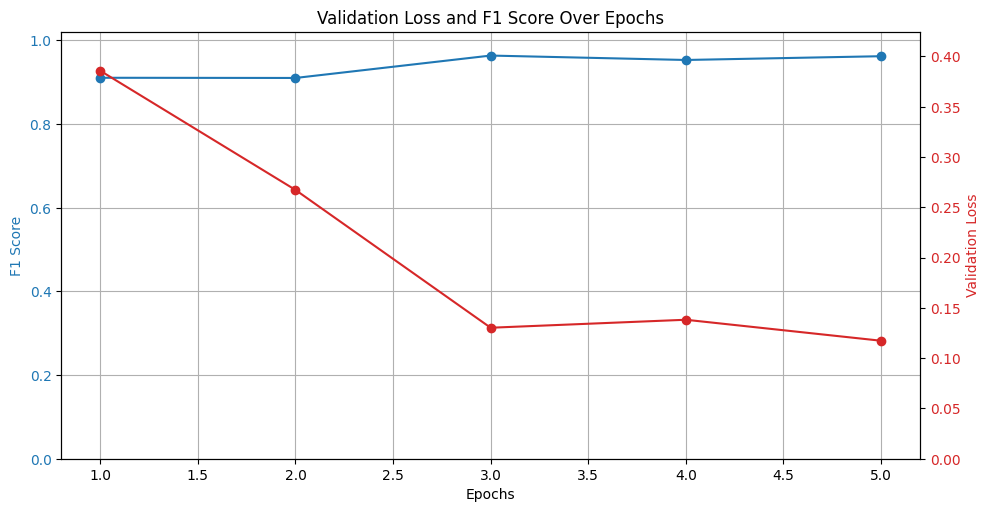

In [ ]:
#@title Plot Validation Loss and F1 Score over Epochs
results_df = pd.DataFrame({
    'Epoch': list(range(1, num_epochs + 1)),
    'Validation Loss': validation_losses,
    'F1 Score': validation_f1_scores
})

fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot F1 Score
color = 'tab:blue'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('F1 Score', color=color)
ax1.plot(results_df['Epoch'], results_df['F1 Score'], marker='o', color=color, label='F1 Score')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 1.02)

# Second y-axis for Validation Loss
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Validation Loss', color=color)
ax2.plot(results_df['Epoch'], results_df['Validation Loss'], marker='o', color=color, label='Validation Loss')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, max(validation_losses) * 1.1)

# Grid and legend
ax1.grid()
fig.tight_layout()
plt.title('Validation Loss and F1 Score Over Epochs')
plt.show()

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split, ConcatDataset
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import torch
from torch.utils.data import DataLoader, TensorDataset, ConcatDataset
import numpy as np

Class distribution comparison (percentage):
    Original_Percentage  Predicted_Percentage
0              3.125000              3.190789
1              9.375000              8.585526
2              3.125000              3.125000
3              3.125000              3.190789
4              9.868421              9.802632
5              9.375000             10.098684
6              0.328947              0.756579
7             18.750000             17.072368
8              0.000000              0.526316
9             15.625000             15.394737
10             3.125000              2.960526
11             5.921053              6.809211
12             3.125000              2.697368
13            15.131579             15.789474


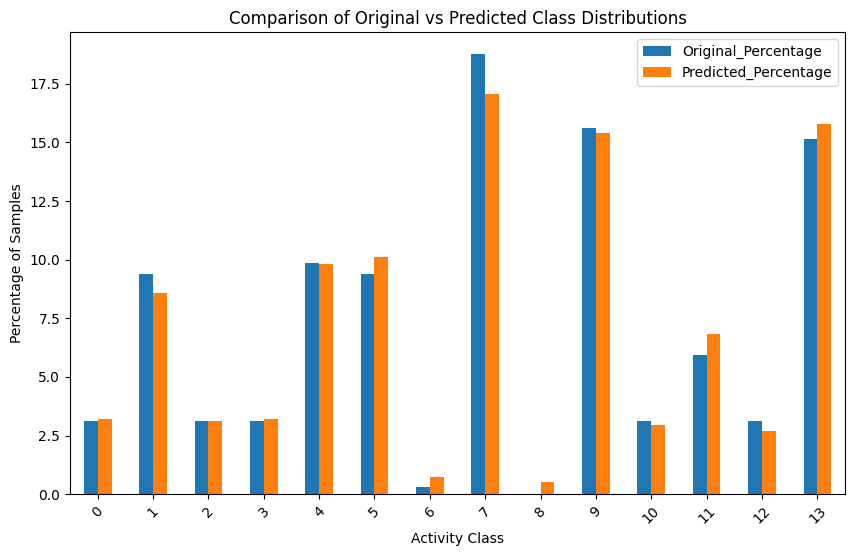

In [ ]:
# @title Compare Predicted Class Distribution Against Original Class Distribution
original_class_distribution = Counter(all_true_labels)
predicted_class_distribution = Counter(all_predicted_labels)

# DataFrame for class distribution comparison
comparison_df = pd.DataFrame({
    'Original': original_class_distribution,
    'Predicted': predicted_class_distribution
}).fillna(0).sort_index()

# Normalize counts to percentages
comparison_df['Original_Percentage'] = (comparison_df['Original'] / comparison_df['Original'].sum()) * 100
comparison_df['Predicted_Percentage'] = (comparison_df['Predicted'] / comparison_df['Predicted'].sum()) * 100

# Display the table with class names
print("Class distribution comparison (percentage):")
print(comparison_df[['Original_Percentage', 'Predicted_Percentage']])

# Plot class distribution comparison
comparison_df[['Original_Percentage', 'Predicted_Percentage']].plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Original vs Predicted Class Distributions')
plt.ylabel('Percentage of Samples')
plt.xlabel('Activity Class')
plt.xticks(rotation=45)
plt.show()

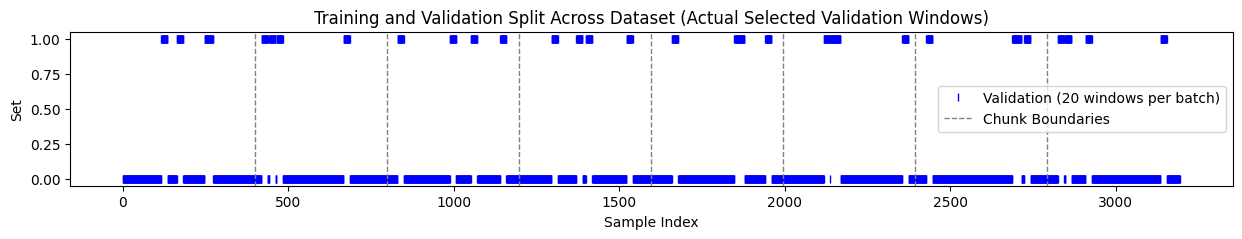

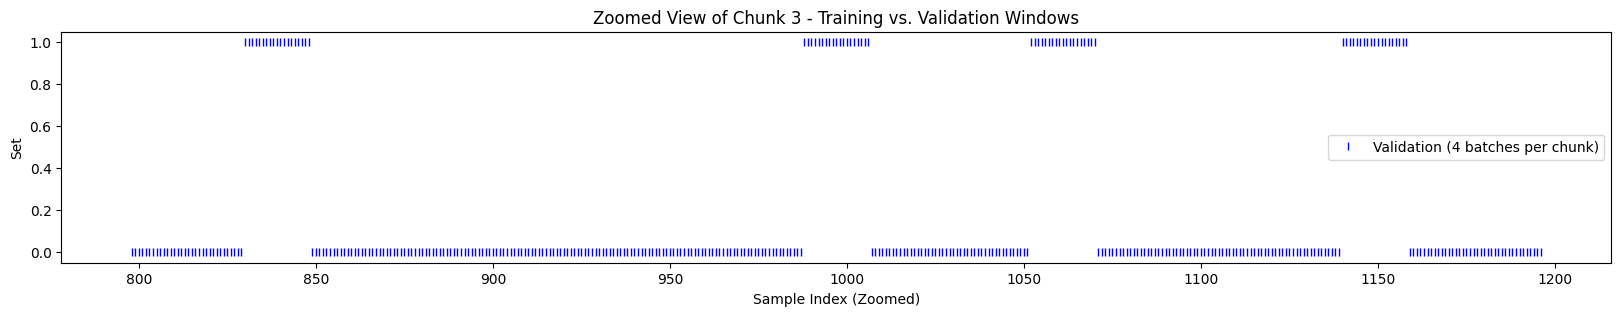

In [ ]:
import matplotlib.pyplot as plt

# Create an array representing the dataset with 1s for validation, 0s for training
dataset_split_visual = np.zeros(len(X_tensor))
dataset_split_visual[validation_indices] = 1  # Mark actual validation indices

# Plot the dataset split with chunk boundaries
plt.figure(figsize=(15, 2))
plt.plot(dataset_split_visual, '|', color='blue', label='Validation')
plt.xlabel('Sample Index')
plt.ylabel('Set')
plt.title('Training and Validation Split Across Dataset (Actual Selected Validation Windows)')

# Add dotted lines to separate the chunks
for i in range(1, num_chunks):
    plt.axvline(i * chunk_size, color='gray', linestyle='--', linewidth=1, label=f'Chunk {i}' if i == 1 else "")

plt.legend(['Validation (20 windows per batch)', 'Chunk Boundaries'])
plt.show()

# Zoom in on a specific chunk to verify the contiguous 40-window block
chunk_to_zoom = 2
zoom_start_idx = chunk_to_zoom * chunk_size
zoom_end_idx = (chunk_to_zoom + 1) * chunk_size if chunk_to_zoom < num_chunks - 1 else len(X_tensor)

# Plot the selected chunk with zoomed-in view
plt.figure(figsize=(20, 3))
plt.plot(range(zoom_start_idx, zoom_end_idx), dataset_split_visual[zoom_start_idx:zoom_end_idx], '|', color='blue', label='Validation')
plt.xlabel('Sample Index (Zoomed)')
plt.ylabel('Set')
plt.title(f'Zoomed View of Chunk {chunk_to_zoom + 1} - Training vs. Validation Windows')

plt.legend(['Validation (4 batches per chunk)'])
plt.show()
